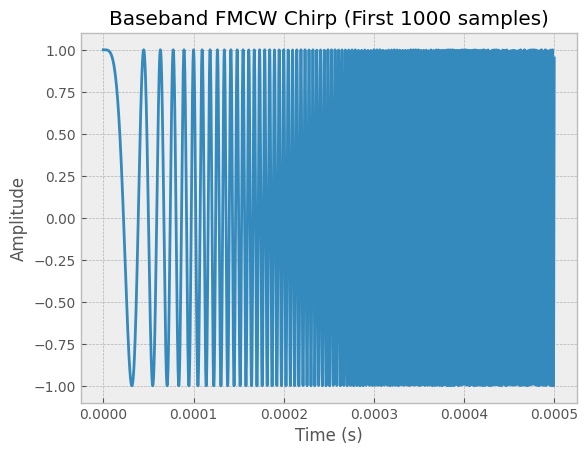

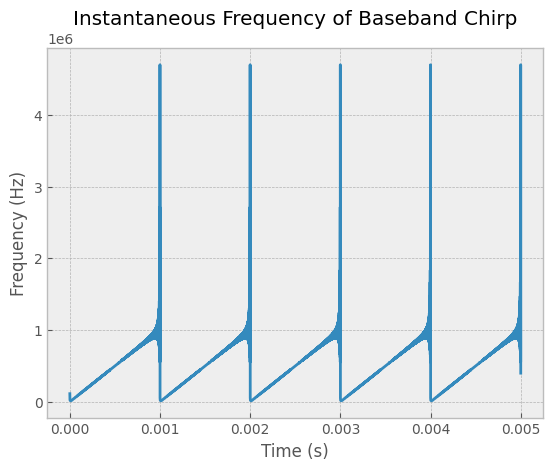

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.signal import spectrogram
# Simulation parameters
fs = 10e6         # 10 MHz sampling rate
T = 1e-3          # 1 ms sweep time
B = 1e6           # 1 MHz bandwidth (baseband chirp from 0 to 1 MHz)
N = int(T * fs)
t = np.linspace(0, T, N, endpoint=False)

# Generate baseband FMCW chirp 
phase = (B / (2 * T)) * t**2
chirp = np.cos(2 * np.pi * phase)

long_signal = np.tile(chirp, 5)
long_t = np.linspace(0, T*5, N*5, endpoint=False)

# Plot time-domain chirp
plt.plot(long_t[:5000], long_signal[:5000])
plt.title("Baseband FMCW Chirp (First 1000 samples)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Get instantaneous frequency using Hilbert transform
analytic = hilbert(long_signal)
inst_phase = np.unwrap(np.angle(analytic))
inst_freq = np.diff(inst_phase) * fs / (2 * np.pi)

# Plot instantaneous frequency
plt.plot(long_t[1:], inst_freq)
plt.title("Instantaneous Frequency of Baseband Chirp")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


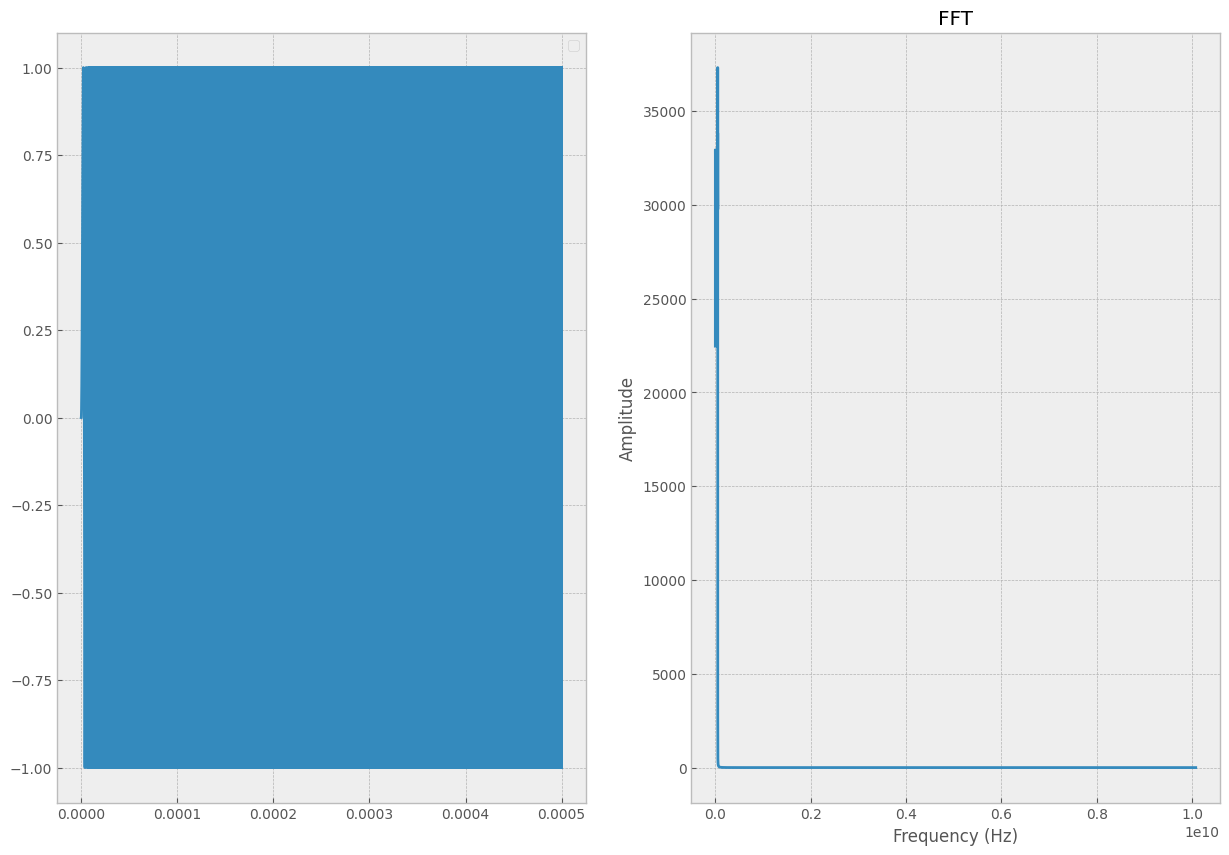

In [ ]:
f_c_hz  = 10e9 # Carrier Frequency 
T_s = 500e-6 # Sweep Period
B_hz = 50e6 # Bandwidth(fmax - fmin of the sweep)

f_s_hz = (f_c_hz + B_hz/2) * 2.01 # sampling freq 
t = np.linspace(0, T_s, int(T_s*f_s_hz), endpoint=False)

phase = (B_hz / (2 * T_s)) * t**2
s = np.sin(2*np.pi*phase)

S = np.fft.fft(s)
freqs = np.fft.fftfreq(len(S), 1/f_s_hz)

fig, axes= plt.subplots(1,2, figsize=(15,10))
axes[0].plot(t, s)
axes[0].legend()
axes[0].grid(True)
# axes[1].set_title("TD")
# axes[1].plot(freqs[:len(freqs)//2], np.abs(S)[:len(S)//2])
# axes[1].set_xlabel("Frequency (Hz)")
# axes[1].set_ylabel("Amplitude")
# axes[1].set_title("FFT")
plt.grid(True)


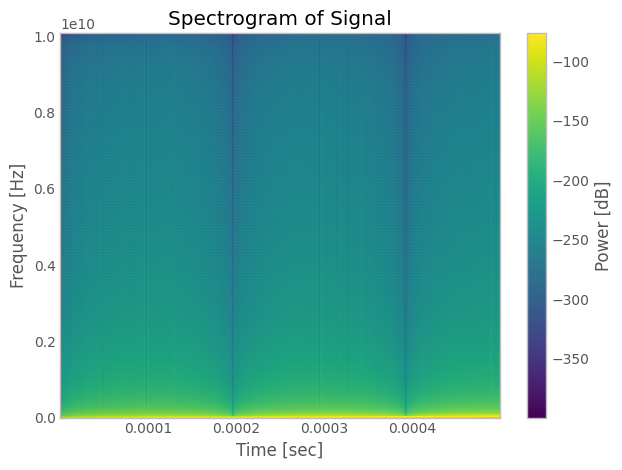

In [53]:
f, t_spec, Sxx = spectrogram(s, f_s_hz, window='hann', nperseg=1024, noverlap=512)

# Plot it
plt.pcolormesh(t_spec, f, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Signal')
plt.colorbar(label='Power [dB]')
plt.grid(True)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


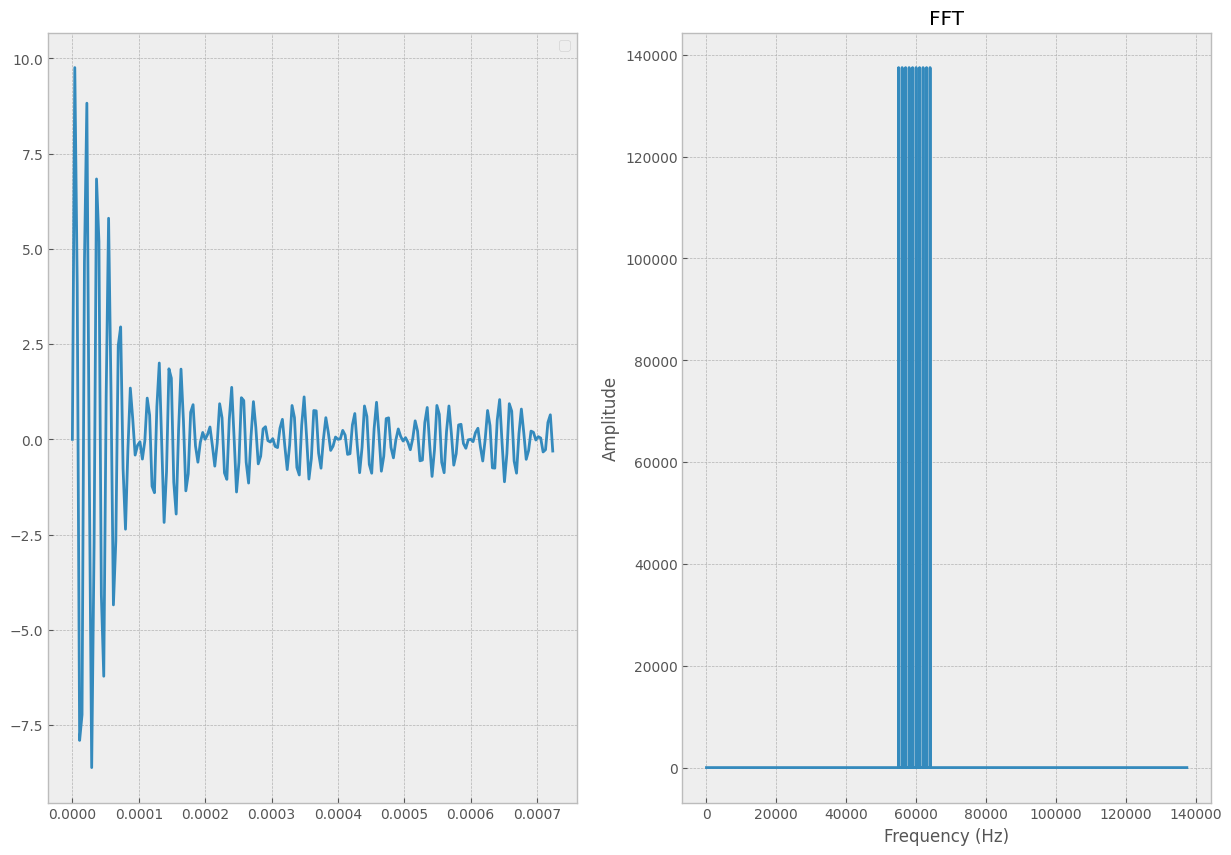

In [43]:
# constant freq 
plt.style.use('bmh')
fc = 55e3 # signal freq
fs = fc * 5# sampling freq
time_len = 1

t = np.linspace(0, time_len , int(fs*time_len), endpoint=False)
s = np.zeros_like(t)
for i in range(10): 
    s+= np.sin(2 * np.pi * (fc+i*1e3) * t)
# s = np.sin(2 * np.pi * fc * t) + 10*np.sin(2 * np.pi *( fc+10e3) * t)
S = np.fft.fft(s)
freqs = np.fft.fftfreq(len(S), 1/fs)

fig, axes= plt.subplots(1,2, figsize=(15,10))
axes[0].plot(t[:200], s[:200])
axes[0].legend()
axes[0].grid(True)
axes[1].set_title("TD")
axes[1].plot(freqs[:len(freqs)//2], np.abs(S)[:len(S)//2])
axes[1].set_xlabel("Frequency (Hz)")
axes[1].set_ylabel("Amplitude")
axes[1].set_title("FFT")
plt.grid(True)

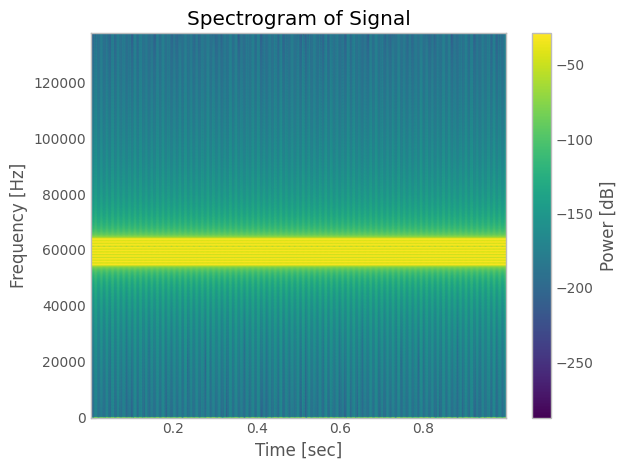

In [45]:
f, t_spec, Sxx = spectrogram(s, fs, window='hann', nperseg=1024, noverlap=512)

# Plot it
plt.pcolormesh(t_spec, f, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Signal')
plt.colorbar(label='Power [dB]')
plt.grid(True)
plt.tight_layout()
plt.show()


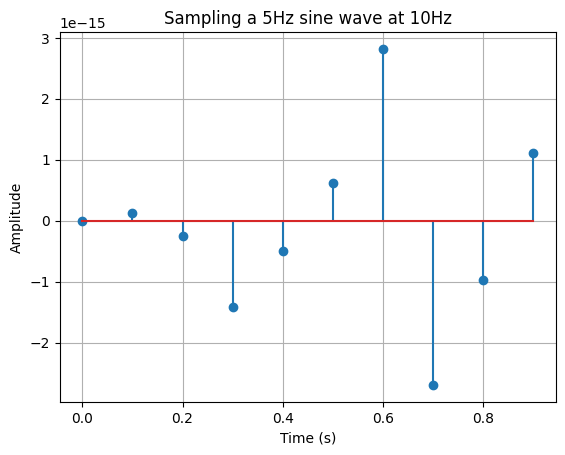

In [10]:
import numpy as np
import matplotlib.pyplot as plt

f = 5  # Signal frequency
fs = 2 * f  # Sampling frequency = 2f (Nyquist rate)
t = np.arange(0, 1, 1/fs)
y = np.sin(2 * np.pi * f * t)

plt.stem(t, y)
plt.title(f"Sampling a {f}Hz sine wave at {fs}Hz")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()
